In [ ]:
!pip install imbalanced-learn

<ipython-input-12-e4a848ebba62>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


Accuracy: 0.8921409214092141

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       922
           1       0.88      0.91      0.89       923

    accuracy                           0.89      1845
   macro avg       0.89      0.89      0.89      1845
weighted avg       0.89      0.89      0.89      1845



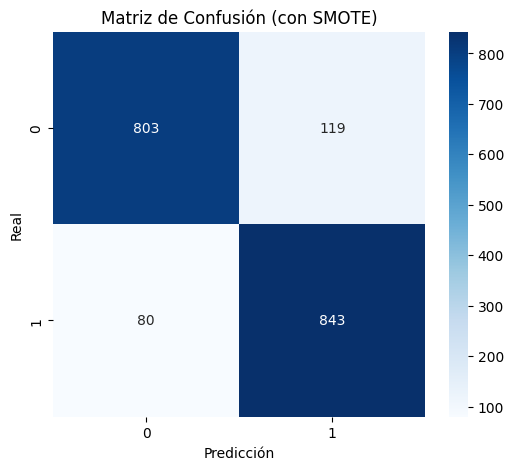

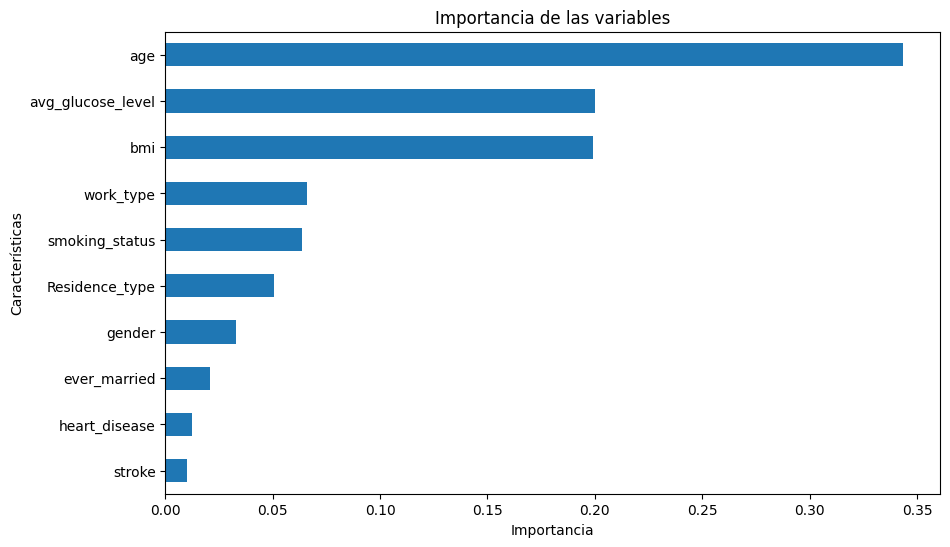

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Cargar el dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')  # Cambia el path si es necesario

# Eliminar columna 'id'
data = data.drop(columns=['id'])

# Rellenar valores faltantes en 'bmi' con la media
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Codificación de variables categóricas
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Definir variables predictoras y variable objetivo
X = data.drop(columns='hypertension')
y = data['hypertension']

# SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Resultados
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (con SMOTE)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.show()